In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

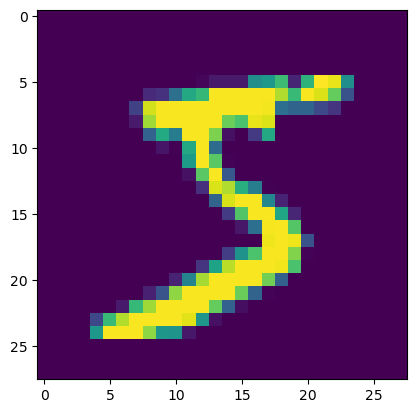

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train = X_train/255

In [7]:
X_test  = X_test/255

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [10]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [11]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [19]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(lr=1.15),metrics = ['accuracy'])

In [20]:
autoencoder.fit(X_train,X_train,epochs=5,validation_data=[X_test,X_test])

Epoch 1/5
1875/1875 [==============================] - 31s 15ms/step - loss: 0.2631 - accuracy: 0.0701 - val_loss: 0.2616 - val_accuracy: 0.0655
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2607 - accuracy: 0.0697 - val_loss: 0.2594 - val_accuracy: 0.0712
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2585 - accuracy: 0.0696 - val_loss: 0.2574 - val_accuracy: 0.0663
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2567 - accuracy: 0.0696 - val_loss: 0.2557 - val_accuracy: 0.0702
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2552 - accuracy: 0.0695 - val_loss: 0.2543 - val_accuracy: 0.0703


In [21]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 241ms/step


Original Image


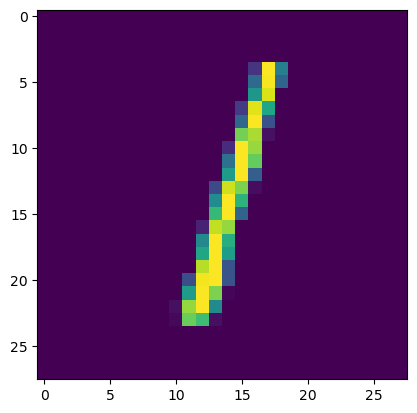

Attempted Reconstruction(after autoencoder)


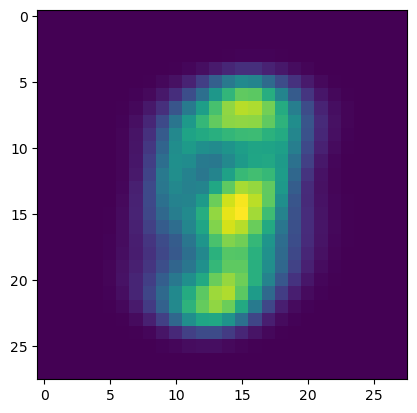

In [22]:
n=2
print('Original Image')
plt.imshow(X_test[n])
plt.show()
print('Attempted Reconstruction(after autoencoder)')
plt.imshow(passed_images[n])